In [1]:
import numpy as np
import pandas as pd
import json
import os
import gzip
from math import log
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
dfs = pd.read_excel("../data/experimental/gcPBM/GSE97793_Combined_ets1_100nM_elk1_100nM_50nM_gabpa_100nM_log.xlsx")

In [3]:
dfs.head()

,ID_REF,ID,Sequence,Ets1_100nM,Elk1_100nM,Elk1_50nM,Gabpa_100nM
0,1,Bound,TCGGCGGCGGAGCACCGGAAGTTCTGCAGCACTGGC,10.7065,10.7019,10.7916,11.4822
1,2,Bound,GTTTAGATAACTGACCGGATGATTACCCTCTCCATC,9.4762,8.8623,9.1490,8.7324
2,3,Bound,TGGACCTAGGGCAGACGGAAGTTTTGGGAGGGCCGG,9.5459,9.3227,9.6038,9.0362
3,4,Bound,ATCAAGGCGCGGCGGCGGAAAAATGTGAAATGGCTT,7.8294,8.7105,8.7679,8.8320
4,5,Bound,TCCTTACTCCGTGGCCGGAACTGGGTGCGCTCCTAC,9.7629,9.1093,9.5305,9.1809


In [4]:
all_seqs = dfs["Sequence"]
yvals = np.load('preds/ets1_yvals.npy')

In [5]:
outliers = []
for idx, pred in enumerate(yvals):
    if pred >= 0.15:
        outliers.append(all_seqs[idx])
print(len(outliers), len(all_seqs))

102 13675


In [6]:
def checkMatch(motif, seq, tol = 1):
    for ids in range(len(seq)-len(motif)+1):
        curr_tol = tol
        success = True
        for idm in range(len(motif)):
            if seq[ids+idm] != motif[idm]:
                curr_tol -= 1
            if curr_tol < 0:
                success = False
                break
        if success: return True
    return False

In [7]:
fox_ets_motif = "CATAACAGGAA"
rev_comp_motif = "TTCCTGTTATG"
tol =  2

count = 0
for seq in outliers:
    if checkMatch(fox_ets_motif, seq, tol) or checkMatch(rev_comp_motif, seq, tol):
        count += 1
outlier_enrichment = count/len(outliers)
print(outlier_enrichment)

0.029411764705882353


In [8]:
count = 0
for seq in all_seqs:
    if checkMatch(fox_ets_motif, seq, tol) or checkMatch(rev_comp_motif, seq, tol):
        count += 1
average_enrichment = count/len(all_seqs)
print(average_enrichment)

0.027276051188299816


<BarContainer object of 2 artists>

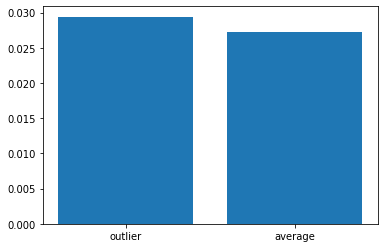

In [9]:
plt.bar(['outlier', 'average'], [outlier_enrichment, average_enrichment])

In [10]:
fox_ets_motif = "AAACAGGAA"
rev_comp_motif = "TTCCTGTTT"
tol =  0

count = 0
for seq in outliers:
    if checkMatch(fox_ets_motif, seq, tol) or checkMatch(rev_comp_motif, seq, tol):
        count += 1
outlier_enrichment = count/len(outliers)
print(outlier_enrichment)

0.0196078431372549


In [11]:
count = 0
for seq in all_seqs:
    if checkMatch(fox_ets_motif, seq, tol) or checkMatch(rev_comp_motif, seq, tol):
        count += 1
average_enrichment = count/len(all_seqs)
print(average_enrichment)

0.010310786106032907


<BarContainer object of 2 artists>

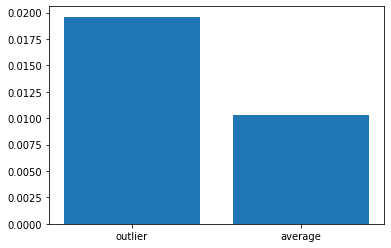

In [12]:
plt.bar(['outlier', 'average'], [outlier_enrichment, average_enrichment])

In [13]:
fox_motif = "GTAAACAA"
rc_fox_motif = "TTGTTTAC"
tol =  2

count = 0
for seq in outliers:
    if checkMatch(fox_motif, seq, tol) or checkMatch(rc_fox_motif, seq, tol):
        count += 1
outlier_enrichment = count/len(outliers)
print(outlier_enrichment)

0.1568627450980392


In [14]:
count = 0
for seq in all_seqs:
    if checkMatch(fox_motif, seq, tol) or checkMatch(rc_fox_motif, seq, tol):
        count += 1
average_enrichment = count/len(all_seqs)
print(average_enrichment)

0.13053016453382085


<BarContainer object of 2 artists>

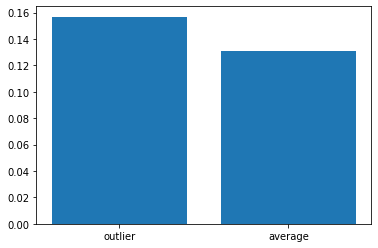

In [15]:
plt.bar(['outlier', 'average'], [outlier_enrichment, average_enrichment])